<a href="https://colab.research.google.com/github/Siyuan-uoftece/Pitch-Perfect/blob/main/Aps360_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This* is the notebook that will be used for the "Perfect Pitch AI Project"

In [ ]:
!pip install comet_ml

# Data Upload

In [ ]:
import librosa.display
print(torch.load('/content/aps360_split_data/test/0/bass_electronic_018-024-025'))
print(torch.load('/content/aps360_split_data/test/0/bass_electronic_018-024-025')
.shape)
librosa.display.specshow(torch.load('/content/aps360_split_data/test/0/bass_electronic_018-024-025'), sr=22050, x_axis='time')


NameError: ignored

In [ ]:
librosa.display.specshow(torch.load('/content/aps360_split_data/test/3/flute_synthetic_000-051-100'), sr=22050, x_axis='time')


NameError: ignored

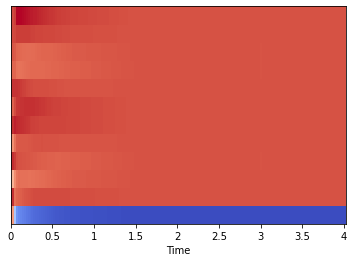

In [ ]:
librosa.display.specshow(torch.load('/content/aps360_split_data/test/3/keyboard_electronic_002-087-100'), sr=22050, x_axis='time')


In [ ]:
https://magenta.tensorflow.org/datasets/nsynth?fbclid=IwAR26dk2P5RYzkEze2yT3BR762w42aONEU7OxxXsFd4XA4ii5XOMDy17Kt24

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/MyDrive/Colab Notebooks/validimages.zip" -d "./aps360_valid_images"

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image = img.imread("/content/aps360_valid_images/valid/90/bass_synthetic_009-090-050.png")
# print(image.shape)
# plt.imshow(image)
image_rgb = image[57:428,78:578,0:3]
plt.imshow(image_rgb)
print(image_rgb.shape)


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils import data
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import glob
import random
images = []
path = "/content/aps360_valid_images/valid/"
transform = transforms.Compose(
        [
        transforms.Resize((224,224)),
        transforms.ToTensor()
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        ])
data = ImageFolder(path,transform = transform)
train_loader = torch.utils.data.DataLoader(data, batch_size= 256
                                        , shuffle = True)



FileNotFoundError: ignored

In [ ]:
from google.colab import drive
import numpy as np
import time
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils import data
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import glob
import random
model = NoteIdentifier2()
path = '/content/drive/MyDrive/something'
torch.save(model.state_dict(), path)

In [ ]:
i = 0
for d in train_loader:
  dummy = d
  for k in d:
    for o in k:
      
      break
    break
  break

dummy = tuple(dummy)
print(type(dummy))

<class 'tuple'>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [ ]:
#### Dependencies ####
#### Import Comet for experiment tracking and visual tools
from comet_ml import Experiment
####
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt


from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim #for gradient descent
from torchvision import datasets, transforms

ModuleNotFoundError: ignored

In [ ]:
#Comet used for comparing models
experiment = Experiment(api_key="sQZJgQy0lnyOqQuQV0TRKGwSH",
                        project_name="aps360")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/maplestorytot/aps360/d48abff4f38d4844a4b006607e2f7782



In [ ]:
import numpy as np
import librosa
import os.path
import json
import torch
import torch.nn as nn
import torch.nn.functional as F

TOTAL_NUM_PITCHES = 12
DOT_WAV = '.wav'


class FileReader():
    def __init__(self):
        pass

    def read_entire(self, file_path):
      with open(file_path, 'r') as content_file:
        content = content_file.read()
        return content
class NSynthData():
  def __init__(self, path_to_file, metadata):
    self._path_to_file = path_to_file
    self._metadata = metadata
    self._time_series, self._sampling_rate = librosa.load(path_to_file)

  def get_name(self):
    return self._metadata['note_str']

  def get_pitch(self):
    return self._metadata['pitch']

  def get_audio_as_time_series(self):
    return self._time_series

  def get_audio_sampling_rate(self):
    return self._sampling_rate

class NSynthFormattedData():
  def __init__(self, data: NSynthData, mel_frequency_cepstral_coefficients: np.array):
    self._name=data.get_name()
    self._pitch=data.get_pitch()
    self._mffcs=mel_frequency_cepstral_coefficients
  def get_formatted_mff_coefficients(self):
    return self._mffcs
  def get_name(self):
    return self._name
  def get_pitch(self):
    return self._pitch % 12
    
class NSynthDataLoader():
  def __init__(self, path_to_metadata: str, path_to_audio: str):
    self._path_to_metadata = path_to_metadata
    self._path_to_audio = path_to_audio

    self._file_reader = FileReader()
    self._audio_metadata_as_str = self._file_reader.read_entire(
        path_to_metadata)
    self._audio_metadata_as_dict = json.loads(self._audio_metadata_as_str)

  def __iter__(self):
    total_samples = len(self._audio_metadata_as_dict)
    for i, (key, value) in enumerate(self._audio_metadata_as_dict.items()):
      path_to_file = os.path.join(self._path_to_audio, key) + DOT_WAV
      print("Progress: {}/{}".format(i, total_samples))
      newData = NSynthData(path_to_file, value)
      yield newData


class NSynthDataWriter():
  def __init__(self, folderToWriteTo: str):
    self._folder = folderToWriteTo
    if not os.path.exists(folderToWriteTo):
      os.makedirs(folderToWriteTo)
    for i in range(TOTAL_NUM_PITCHES):
      inner_folder = os.path.join(folderToWriteTo, str(i))
      if not os.path.exists(inner_folder):
        os.makedirs(inner_folder)


  def write_data(self, data: NSynthFormattedData):
    filename = os.path.join(self._folder, str(data.get_pitch()), data.get_name())
    torch.save(data.get_formatted_mff_coefficients(), filename)
    # with open(filename, "w") as myfile:
    #   myfile.write(data.get_formatted_mff_coefficients())

class NSynthDataFormatter():
  def __init__(self):
    pass

  def format_data(self, data: NSynthData):
    return NSynthFormattedData(data, librosa.feature.mfcc(y=data.get_audio_as_time_series(), sr=data.get_audio_sampling_rate(), n_mfcc=TOTAL_NUM_PITCHES))

class NSynthDataProcessor():
  def __init__(self, loader: NSynthDataLoader, formatter: NSynthDataFormatter, writer: NSynthDataWriter):
    self._loader = loader
    self._formatter = formatter
    self._writer = writer

  def process(self, number_samples=1):
    for data in self._loader:
      writer.write_data(self._formatter.format_data(data))


class NSynthDataCalculator():
  def __init__(self):
    pass
  def calculate_distribution_pitch(self, folder):
    mapping = {}
    for name in os.listdir(folder):
      mapping[name] = len(os.listdir(os.path.join(folder, name)))
    print(mapping)
    return mapping


calculator = NSynthDataCalculator()
calculator.calculate_distribution_pitch("./aps360_split_data/train")
    



# test_val_train = 'valid'#test valid
# loader=NSynthDataLoader('C:\\Users\\User\\Downloads\\nsynth-{}\\examples.json'.format(test_val_train),
#                         'C:\\Users\\User\\Downloads\\nsynth-{}\\audio'.format(test_val_train))
# formatter=NSynthDataFormatter()
# writer = NSynthDataWriter(os.path.join(test_val_train))
# processor=NSynthDataProcessor(loader, formatter, writer)
# formatted_samples=processor.process()




{'0': 26558, '6': 22982, '9': 25192, '2': 23654, '3': 23375, '4': 23537, '11': 25315, '7': 23426, '10': 25290, '5': 23266, '1': 23513, '8': 23097}


{'0': 26558,
 '1': 23513,
 '10': 25290,
 '11': 25315,
 '2': 23654,
 '3': 23375,
 '4': 23537,
 '5': 23266,
 '6': 22982,
 '7': 23426,
 '8': 23097,
 '9': 25192}

In [ ]:
BATCH_SIZE = 64
PATH_TO_TEST = "./aps360_split_data/test"
PATH_TO_TRAIN = "./aps360_split_data/train"
PATH_TO_VALID = "./aps360_split_data/valid"
transform = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5)),
                                ])

def loader(path_to_file):
  # print(torch.from_numpy(torch.load(path_to_file)).shape)
  return torch.from_numpy(torch.load(path_to_file))
def is_valid_file(path_to_file):
  return True

np.random.seed(50)
test_data_folder = datasets.DatasetFolder(root=PATH_TO_TEST, loader = loader, is_valid_file=is_valid_file, transform=transform)


test_loader = torch.utils.data.DataLoader(test_data_folder, batch_size=BATCH_SIZE, shuffle = True)
del test_data_folder


train_data_folder = datasets.DatasetFolder(root=PATH_TO_TRAIN, loader = loader, is_valid_file=is_valid_file, transform=transform)
# np.random.shuffle(train_data_folder)
train_loader = torch.utils.data.DataLoader(train_data_folder, batch_size=BATCH_SIZE, shuffle=True)
del train_data_folder



valid_data_folder = datasets.DatasetFolder(root=PATH_TO_VALID, loader = loader, is_valid_file=is_valid_file, transform=transform)
# np.random.shuffle(valid_data_folder)
valid_loader = torch.utils.data.DataLoader(valid_data_folder, batch_size=BATCH_SIZE, shuffle=True)
del valid_data_folder


# np.random.shuffle(test_data_folder)
# np.random.shuffle(train_data_folder)
# np.random.shuffle(valid_data_folder)

# test_loader = torch.utils.data.DataLoader(test_data_folder, batch_size=BATCH_SIZE)
# train_loader = torch.utils.data.DataLoader(train_data_folder, batch_size=BATCH_SIZE)
# valid_loader = torch.utils.data.DataLoader(valid_data_folder, batch_size=BATCH_SIZE)
for ind, i in enumerate(train_loader):
  if ind == 2:
    break
  print(len(i[0]))
  print(i[1])
  print(i[1].shape)
  print(i[0].shape)

64
tensor([ 0,  3,  3,  4,  7,  4,  3,  1,  5,  5,  1,  8,  3,  2,  8, 11,  2,  3,
         5,  8,  5,  5,  8,  0,  3,  3,  2,  8,  4,  8, 10,  2,  7,  7,  0,  3,
         6,  8,  7, 10,  4,  2, 11, 10,  8,  2,  7,  8,  4,  2,  2, 10,  5, 10,
         6,  7,  7,  5,  5, 10, 11,  1,  5,  0])
torch.Size([64])
torch.Size([64, 1, 224, 224])
64
tensor([ 8,  2,  3,  3,  1,  4,  0,  8,  7,  0,  0,  0,  3,  3,  4,  7, 11, 11,
         4, 11,  4,  3, 10,  5,  5,  6,  2,  9,  2,  4,  3,  1,  6,  7,  5, 10,
         1,  4,  1,  7,  3,  2, 10,  5,  4,  6,  6,  7,  9,  8,  7,  2,  4, 10,
         5,  8,  2,  4,  8,  9,  3,  7,  6,  4])
torch.Size([64])
torch.Size([64, 1, 224, 224])


# **Training**

In [ ]:
#Define a unique model name to save, like Alpha Go.
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:                            batch_size,
                       
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [ ]:
#calculate training accuracy
def calculate_error(labels, predictions):
  error_count = 0
  for label,prediction in zip(labels, predictions):
    if label != prediction:
      error_count += 1

  # print("error_count was: ", error_count)
  return error_count

In [ ]:
#Validation/testing code
def evaluate(net, loader, criterion):
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        if i == 20:
          break
        input, labels = data
        ############################################
        #To Enable GPU Usage
        # input = input.repeat((1,3,1,1))
        if torch.cuda.is_available():
          input = input.cuda()
          labels = labels.cuda()
        ############################################
        outputs = net(input)
        loss = criterion(outputs, labels)
        predictions = outputs.max(1)[1]
        total_err += calculate_error(labels,predictions)
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

In [ ]:
#Training code for the model
import time
def train_net(net, train_data, val_data, batch_size=64, learning_rate=0.0005, num_epochs=10):

  ########################################################################
  # Fixed PyTorch random seed for reproducible result
  torch.manual_seed(1000)
  ########################################################################
  ########################################################################
  # Define the Loss function and optimizer
  # The loss function Cross_Entropy_Loss which already has an implementation
  # of softmax within.
  # Optimizer will be SGD with Momentum.
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(net.parameters(), lr=learning_rate)
  ########################################################################
  # Set up some numpy arrays to store the training/test loss/erruracy
  train_err = np.zeros(num_epochs)
  train_acc = np.zeros(num_epochs)
  train_loss = np.zeros(num_epochs)
  val_err = np.zeros(num_epochs)
  val_acc = np.zeros(num_epochs)
  val_loss = np.zeros(num_epochs)
  files = []
  ########################################################################
  # Train the network
  # Loop over the data iterator and sample a new batch of training data
  # Get the output from the network, and optimize our loss function.
  start_time = time.time()
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      total_train_loss = 0.0
      total_train_err = 0.0
      total_epoch = 0
      for i, data in enumerate(train_data, 0):
          # Get the inputs
          # if i == 50:
          #   break
          print(i)
          inputs, labels = data
          # inputs = inputs.repeat((1,3,1,1))
          #############################################
          #To Enable GPU Usage
          if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
          #############################################
          # Zero the parameter gradients
          optimizer.zero_grad()
          # Forward pass, backward pass, and optimize
          outputs = net(inputs)
          # print(outputs.shape)
          # print(outputs)
          predictions = outputs.max(1)[1]
          # print("Predictions:", predictions)
          # print("After Predictions")
          loss = criterion(outputs, labels)
          # print("After Loss")
          loss.backward()
          # print("After loss.backward")
          optimizer.step()
          #print("After optimizer.step")

          
          # Need implementation!!
          # Calculate the statistics
          # corr = (outputs > 0.0).squeeze().long() != labels
          # print("error:", calculate_error(labels,predictions))
          total_train_err += calculate_error(labels,predictions)
          total_train_loss += loss.item()
          total_epoch += len(labels)

      print("Finished {} loop".format(epoch+1))
      train_err[epoch] = float(total_train_err) / total_epoch
      train_acc[epoch] = 1 - train_err[epoch]
      train_loss[epoch] = float(total_train_loss) / (i+1)
      val_err[epoch], val_loss[epoch] = evaluate(net, val_data, criterion)
      val_acc[epoch] = 1-val_err[epoch]
      print(("Epoch {}: Train accuracy: {}, Train loss: {} |"+
              "Validation accuracy: {}, Validation loss: {}").format(
                  epoch + 1,
                  train_acc[epoch],
                  train_loss[epoch],
                  val_acc[epoch],
                  val_loss[epoch]))
      # Save the current model (checkpoint) to a file
  model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
  files.append(model_path)
  torch.save(net.state_dict(), model_path)
  print('Finished Training')
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
  # Write the train/test loss/err into CSV file for plotting later
  epochs = np.arange(1, num_epochs + 1)
  
  np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
  np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
  np.savetxt("{}_val_acc.csv".format(model_path), val_acc)
  np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
  return files

In [ ]:
# Plot Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_acc = np.loadtxt("{}_train_acc.csv".format(path))
    val_acc = np.loadtxt("{}_val_acc.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Accuracy")
    n = len(train_acc) # number of epochs
    plt.plot(range(1,n+1), train_acc, label="Train")
    plt.plot(range(1,n+1), val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [ ]:
import time
def train_dummy(net, img, batch_size=1, learning_rate=0.1, num_epochs=1000):

  ########################################################################
  # Fixed PyTorch random seed for reproducible result
  torch.manual_seed(1000)
  ########################################################################
  ########################################################################
  # Define the Loss function and optimizer
  # The loss function Cross_Entropy_Loss which already has an implementation
  # of softmax within.
  # Optimizer will be SGD with Momentum.
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(net.parameters(), lr=learning_rate)
  ########################################################################
  # Set up some numpy arrays to store the training/test loss/erruracy
  train_err = np.zeros(num_epochs)
  train_acc = np.zeros(num_epochs)
  train_loss = np.zeros(num_epochs)
  val_err = np.zeros(num_epochs)
  val_acc = np.zeros(num_epochs)
  val_loss = np.zeros(num_epochs)
  files = []
  ########################################################################
  # Train the network
  # Loop over the data iterator and sample a new batch of training data
  # Get the output from the network, and optimize our loss function.
  start_time = time.time()
  for epoch in range(num_epochs):  # loop over the dataset multiple times
    total_train_loss = 0.0
    total_train_err = 0.0
    total_epoch = 0
    
        # Get the inputs

    inputs, labels = img
    # inputs = inputs.repeat((1,3,1,1))
    #############################################
    #To Enable GPU Usage
    if torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()
    #############################################
    # Zero the parameter gradients
    optimizer.zero_grad()
    # Forward pass, backward pass, and optimize
    outputs = net(inputs)
    print(outputs.shape)
    # print(outputs)
    predictions = outputs.max(1)[1]
    # print("Predictions:", predictions)
    # print("After Predictions")
    loss = criterion(outputs, labels)
    # print("After Loss")
    loss.backward()
    # print("After loss.backward")
    optimizer.step()
    #print("After optimizer.step")

    
    # Need implementation!!
    # Calculate the statistics
    # corr = (outputs > 0.0).squeeze().long() != labels
    # print("error:", calculate_error(labels,predictions))
    total_train_err += calculate_error(labels,predictions)
    total_train_loss += loss.item()
    total_epoch += len(labels)

    print("Finished {} loop".format(epoch+1))
    train_err[epoch] = float(total_train_err) / total_epoch
    train_acc[epoch] = 1 - train_err[epoch]
    train_loss[epoch] = float(total_train_loss) / (i+1)
    # val_err[epoch], val_loss[epoch] = evaluate(net, val_data, criterion)
    # val_acc[epoch] = 1-val_err[epoch]
    print(("Epoch {}: Train accuracy: {}, Train loss: {} |"+
            "Validation accuracy: {}, Validation loss: {}").format(
                epoch + 1,
                train_acc[epoch],
                train_loss[epoch],
                val_acc[epoch],
                val_loss[epoch]))
      # Save the current model (checkpoint) to a file
  model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
  files.append(model_path)
  torch.save(net.state_dict(), model_path)
  print('Finished Training')
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
  # Write the train/test loss/err into CSV file for plotting later
  epochs = np.arange(1, num_epochs + 1)
  
  np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
  np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
  np.savetxt("{}_val_acc.csv".format(model_path), val_acc)
  np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
  return files

# Model

In [ ]:
import torchvision.models


class NoteIdentifier(nn.Module):
  def __init__(self):
    super(NoteIdentifier,self).__init__()
    self.name = "N1"
    alexnet = torchvision.models.alexnet(pretrained=True)
    transfer_net = alexnet.features
    self.transfer_net = transfer_net
    # for param in self.net.parameters():
    #   param.requires_grad = False
    self.fc1 = nn.Linear(256*6*6, 2048)
    self.fc2 = nn.Linear(2048, 128)
    

  def forward(self,notes):
    notes = self.transfer_net(notes)
    notes = notes.view(-1, 256 * 6* 6)
    notes = F.relu(self.fc1(notes))
    notes = self.fc2(notes)
    notes = notes.reshape(notes.shape[0],-1) # Flatten to [batch_size]
    return notes




# alexnet = torchvision.models.alexnet(pretrained=True)
# transfer = alexnet.features



class NoteIdentifier2(nn.Module):
  def __init__(self):
    super(NoteIdentifier2, self).__init__()
    self.name = "GI"
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 5, kernel_size = 5)#output size = ((224-5)/1)+1  X5 = 220x220x5
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2) #output size = ((220-2)/2)+1 X5 = 110x110x5
    self.conv2 = nn.Conv2d(in_channels = 5, out_channels = 10, kernel_size = 5)#output size = (110-5)+1 X10 = 106X106X10
    #self.pool again so output size = ((106-2)/2)+1 X10 = 53x53x10
    self.fc1 = nn.Linear(10 * 53 * 53, 2048)
    self.fc2 = nn.Linear(2048, 88) #128 output one hot encoding

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 10 * 53* 53)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = x.reshape(x.shape[0],-1) # Flatten to [batch_size]
    return x



# Train Model!!!!!

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth



CUDA is available!  Training on GPU ...
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished 1 loop
Epoch 1: Train accuracy: 0.12178577062628171, Train loss: 3.32962543964386 |Validation accuracy: 0.31718749999999996, Validation loss: 2.045372554234096
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished 2 loop
Epoch 2: Train accuracy: 0.46900141978230003, Train loss: 1.6525820565223694 |Validation accuracy: 0.6412109375, Validation loss: 1.0643836855888367
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished 3 loop
Epoch 3: Train accuracy: 0.6840195614450229, Train loss: 0.9587477052211761 |Validation accuracy: 0.755859375, Validation loss: 0.7071399348122733
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1

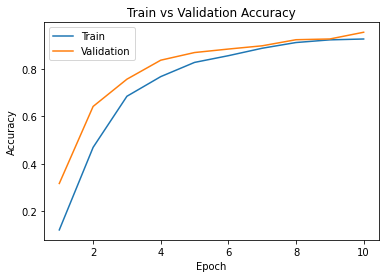

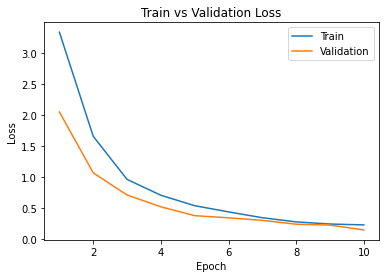

In [ ]:
model_alex = NoteIdentifier()
model_alex.name = "alex1"
if torch.cuda.is_available():
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
print(len(train_loader))
train_net(model_alex, train_loader, train_loader, batch_size=256)
path = get_model_name(model_alex.name, 256, 0.0005, 9)
plot_training_curve(path)

CUDA is available!  Training on GPU ...
199
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
Finished 1 loop
Epoch 1: Train accuracy: 0.1448966713992743, Train loss: 3.8712598870148014 |Validation accuracy: 0.4375, Validation loss: 2.282154151371547
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


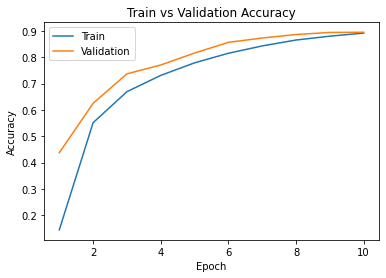

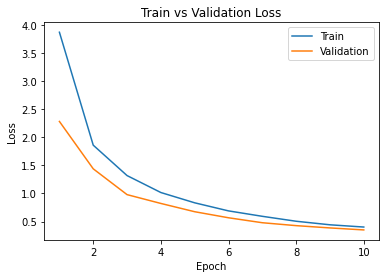

In [ ]:
model1 = NoteIdentifier2()
model1.name = "dummy"
if torch.cuda.is_available():
  model1.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
print(len(train_loader))
train_net(model1, train_loader, train_loader)
path = get_model_name(model1.name, 64, 0.0005, 9)
plot_training_curve(path)